In [60]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2, chi2_contingency, ttest_ind, levene

In [61]:
# Loading Dataset
data= pd.read_csv('Bank-Records.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [62]:
print(data.shape)
print(f'There are {data.shape[0]} rows & {data.shape[1]} columns')

(10000, 18)
There are 10000 rows & 18 columns


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

#### Originally there are 12 integer columns, 2 float columns & 4 string columns

In [65]:
# Remove Columns RowNumber and CustomerId from dataset
data.drop(['RowNumber', 'CustomerId','Surname'], axis = 1, inplace = True)

In [66]:
# Changing data types
data['HasCrCard'] = data['HasCrCard'].astype('category')
data['IsActiveMember'] = data['IsActiveMember'].astype('category')
data['Exited'] = data['Exited'].astype('category')
data['Complain'] = data['Complain'].astype('category')
data['Satisfaction Score'] = data['Satisfaction Score'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Geography'] = data['Geography'].astype('category')
data['Card Type'] = data['Card Type'].astype('category')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CreditScore         10000 non-null  int64   
 1   Geography           10000 non-null  category
 2   Gender              10000 non-null  category
 3   Age                 10000 non-null  int64   
 4   Tenure              10000 non-null  int64   
 5   Balance             10000 non-null  float64 
 6   NumOfProducts       10000 non-null  int64   
 7   HasCrCard           10000 non-null  category
 8   IsActiveMember      10000 non-null  category
 9   EstimatedSalary     10000 non-null  float64 
 10  Exited              10000 non-null  category
 11  Complain            10000 non-null  category
 12  Satisfaction Score  10000 non-null  category
 13  Card Type           10000 non-null  category
 14  Point Earned        10000 non-null  int64   
dtypes: category(8), float64(2), int64(5)


In [68]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Point Earned,10000.0,606.515100,225.924839,119.00,410.00,605.000,801.0000,1000.00


1. Minimum credit is 350 and maximum is 850. Average of credit is 650.5288
2. Given data is for age between 18 to 92. 
3. Tenure is given between 0 to 10 years, where average tenure is 5 years
4. In given data balance of a customer is between 0 to 2 lakh 50 thousand.
5. There are maximum 4 products available
6. There are maximum 1000 points earned using credit card

In [69]:
data.describe(include = ['object','category'])

,Geography,Gender,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Card Type
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,2,2,2,2,2,5,4
top,France,Male,1,1,0,0,3,DIAMOND
freq,5014,5457,7055,5151,7962,7956,2042,2507


1. Three countries data is given. Most of the data is from France.
2. Mostly people has given satisfaction score 3.
3. There are 4 types of card. Most of the people uses DIAMOND card.


In [70]:
# Checking null values
data.isna().sum().sum()

0

#### There are no null values

In [71]:
# Checking duplicated values
data.duplicated().sum()

0

#### There are no duplicated values

In [72]:
numeric_columns = data.select_dtypes(include = ['int64', 'float64'])
numeric_columns

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Point Earned
0,619,42,2,0.00,1,101348.88,464
1,608,41,1,83807.86,1,112542.58,456
2,502,42,8,159660.80,3,113931.57,377
3,699,39,1,0.00,2,93826.63,350
4,850,43,2,125510.82,1,79084.10,425
...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,300
9996,516,35,10,57369.61,1,101699.77,771
9997,709,36,7,0.00,1,42085.58,564
9998,772,42,3,75075.31,2,92888.52,339


In [73]:
category_col = data.select_dtypes(exclude = ['int64', 'float64'])
category_col

,Geography,Gender,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score,Card Type
0,France,Female,1,1,1,1,2,DIAMOND
1,Spain,Female,0,1,0,1,3,DIAMOND
2,France,Female,1,0,1,1,3,DIAMOND
3,France,Female,0,0,0,0,5,GOLD
4,Spain,Female,1,1,0,0,5,GOLD
...,...,...,...,...,...,...,...,...
9995,France,Male,1,0,0,0,1,DIAMOND
9996,France,Male,1,1,0,0,5,PLATINUM
9997,France,Female,0,1,1,1,3,SILVER
9998,Germany,Male,1,0,1,1,2,GOLD


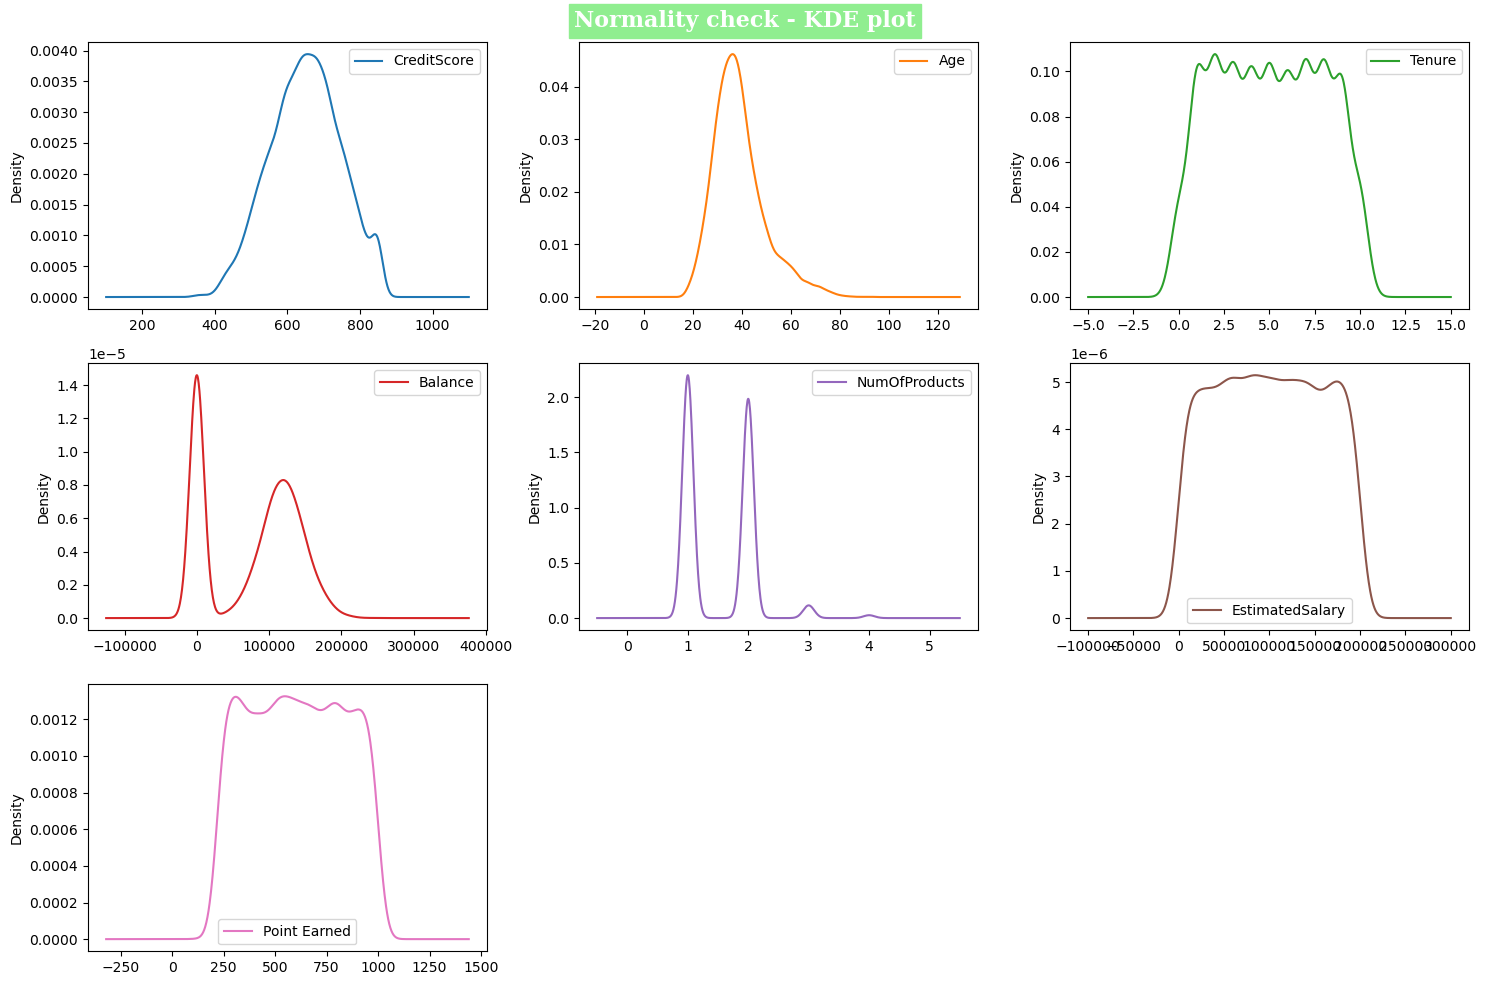

In [74]:
plt.rcParams['figure.figsize'] = [15, 10]

# Collect columns that are 'int64' or 'float64' dtype
numeric_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

# Plot KDE for each numeric column
data[numeric_cols].plot(kind='kde', subplots=True, layout=(3, 3), sharex=False)

# Set the overall title for the entire figure
plt.suptitle('Normality check - KDE plot', fontsize=16, fontfamily='serif', fontweight='bold', backgroundcolor='lightgreen', color='w')
plt.xticks(rotation = 90)
plt.tight_layout()  # Adjust the layout to make room for the suptitle
plt.show()


#### From above graph none of the columns except credit score & age are normally distributed

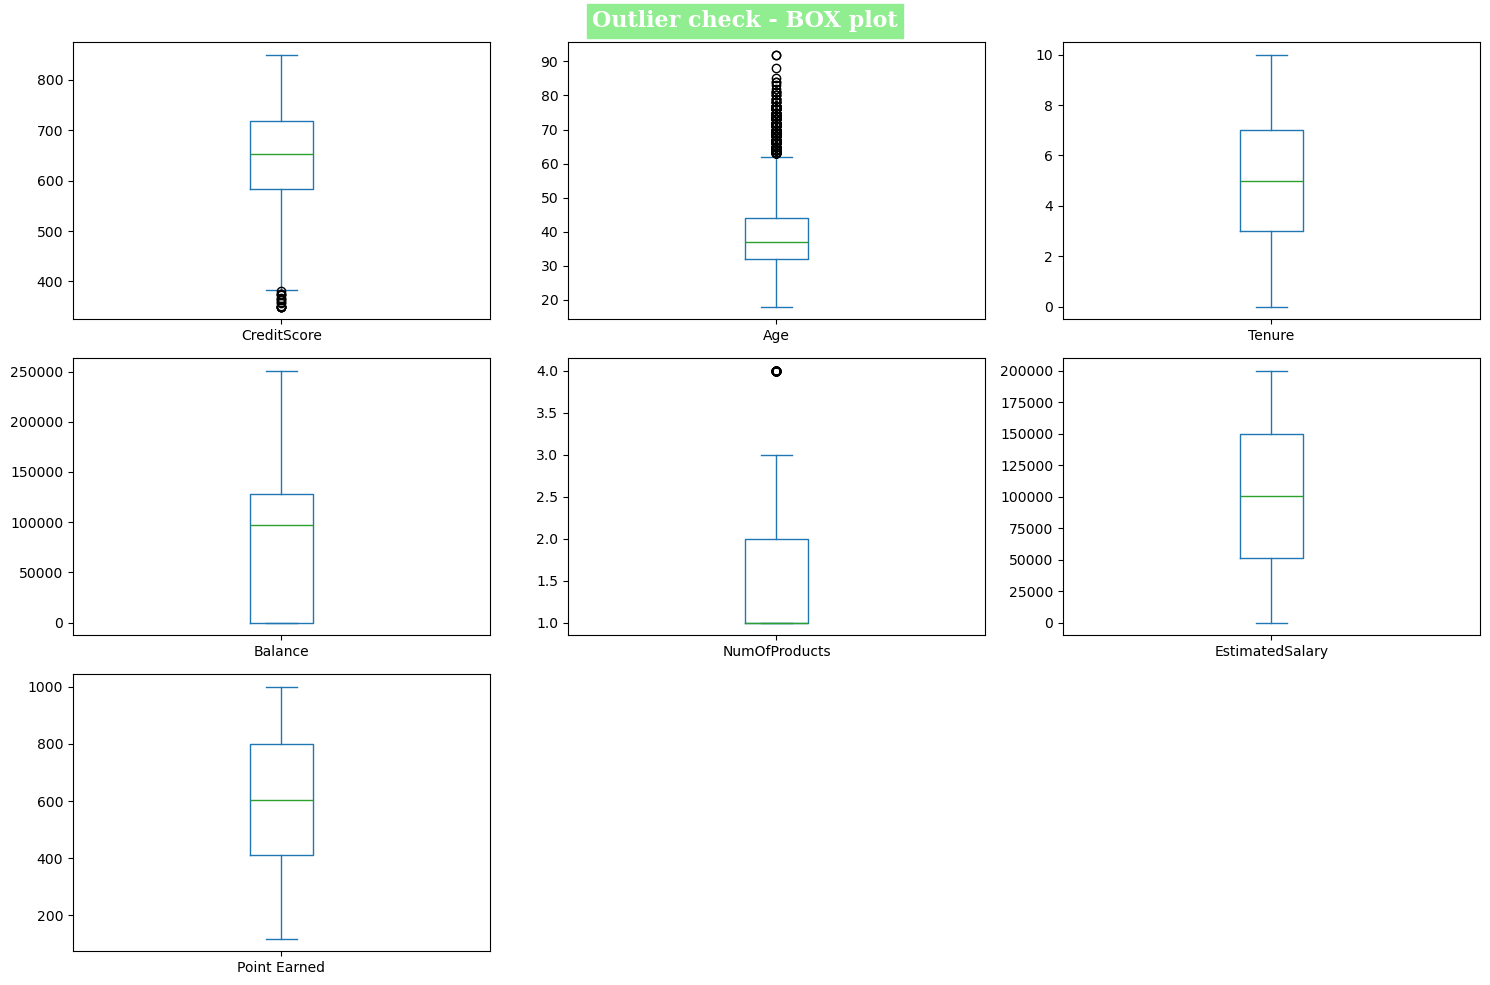

In [75]:
# Check Outliers in the numeric Data
plt.rcParams['figure.figsize'] = (15,10)
# Collect numeric col
numeric_col = [col for col in data.columns if data[col].dtypes in ['int64', 'float64']]

# Plot
data[numeric_col].plot(kind = 'box', subplots = True, layout = (3,3), sharex = False)
# Set the overall title for the entire figure
plt.suptitle('Outlier check - BOX plot', fontsize=16, fontfamily='serif', fontweight='bold', backgroundcolor='lightgreen', color='w')
plt.xticks(rotation = 90)
plt.tight_layout()  # Adjust the layout to make room for the suptitle
plt.show()

#### There are outliers present in column age, credit score. 
#### Only one outlier is there in no of Products

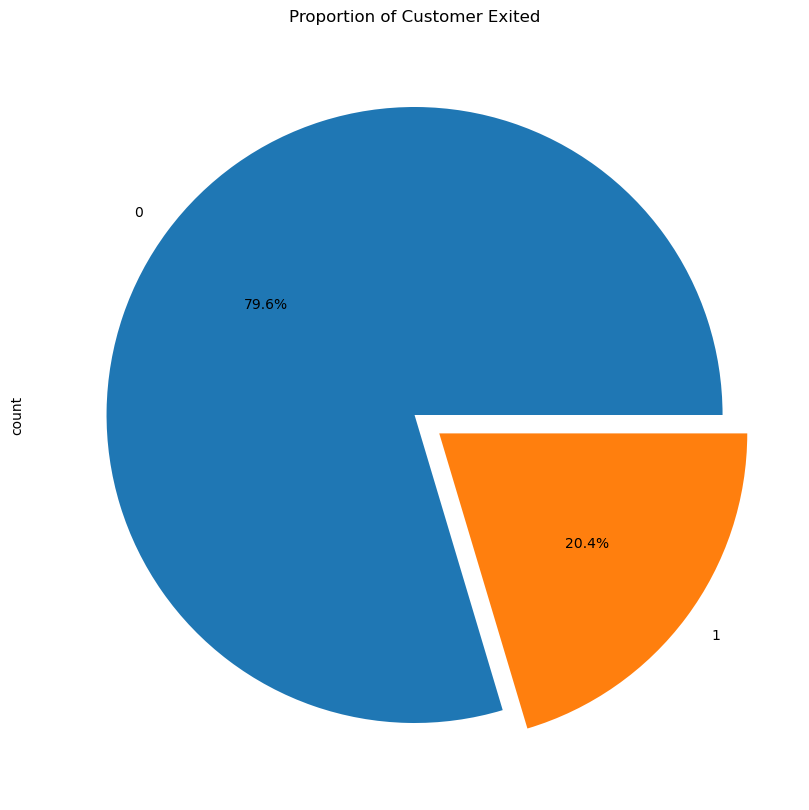

In [76]:
# Check proportion of customer exited
data['Exited'].value_counts().plot.pie(autopct = '%.1f%%', explode = (0,0.1))
plt.title('Proportion of Customer Exited')
plt.show()

##### 20.4 % of the customer have exited the bank

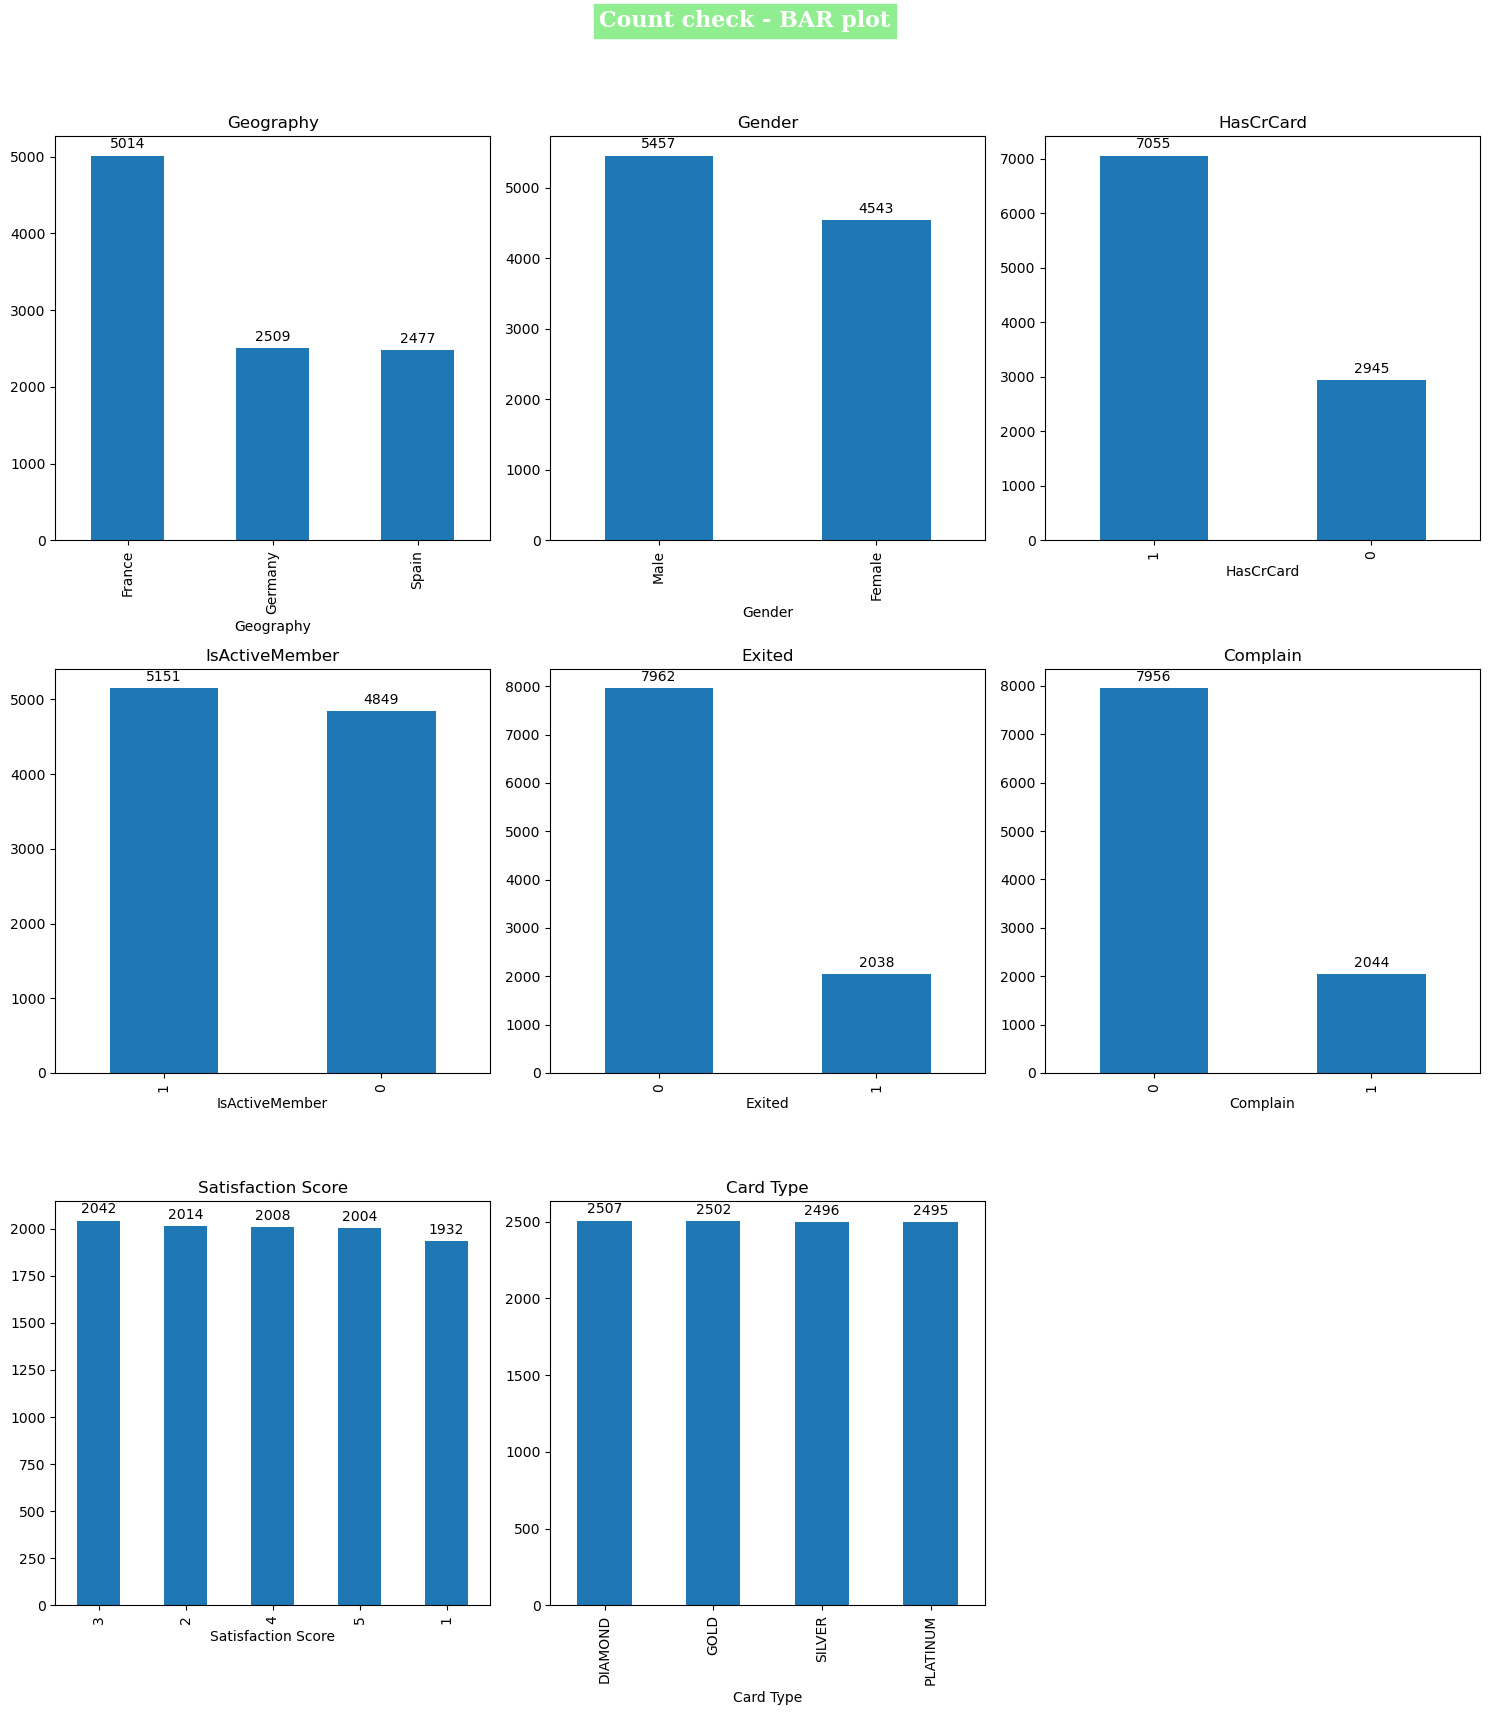

In [77]:

# Collect columns that are not 'int64' or 'float64' dtype
categorical_cols = [col for col in data.columns if data[col].dtype in ['category']]

# Calculate number of rows and columns for subplots
num_plots = len(categorical_cols)
nrows = (num_plots // 3) + 1 if num_plots % 3 != 0 else num_plots // 3
ncols = 3

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 18))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot bar for each categorical column
for i, col in enumerate(categorical_cols):
    plot = data[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


# Add values on top of bars
    for p in plot.patches:
        height = int(p.get_height())
        plot.annotate(f'{height}', 
                      xy=(p.get_x()+ p.get_width() / 2, height), 
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords='offset points',
                      ha='center', va='bottom')
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set the overall title for the entire figure
fig.suptitle('Count check - BAR plot', fontsize=16, fontfamily='serif', fontweight='bold', backgroundcolor='lightgreen', color='w')

# Adjust the layout to make room for the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust rect to not overlap with suptitle
plt.show()

1. 5014 customers are from France followed by Germany and Spain who has 2509, 2477 customers respectively
2. 54% customers are male

3. 70.55% people uses credit card

4. 20% of the people have exited the bank
5. 20.44% of the people have filed the complain.
6. Most of the people (2042) have given satisfaction score 3 followed by scores 2, 4, 5, 1
7. Most of the people uses Diamond card(2507) & Gold(2503) followed by Silver & Platinum

In [78]:
# Checking the count in each categorical variable
for col in category_col:
    val = data[col].value_counts()
    print(val)
    print('*'*50)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
**************************************************
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
**************************************************
Exited
0    7962
1    2038
Name: count, dtype: int64
**************************************************
Complain
0    7956
1    2044
Name: count, dtype: int64
**************************************************
Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64
**************************************************
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64
**************************************************


In [79]:
# Correation check
numeric_columns.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Point Earned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797,0.014608
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204,-0.015330
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000,-0.001515
Point Earned,0.000077,0.002222,-0.010196,0.014608,-0.015330,-0.001515,1.000000


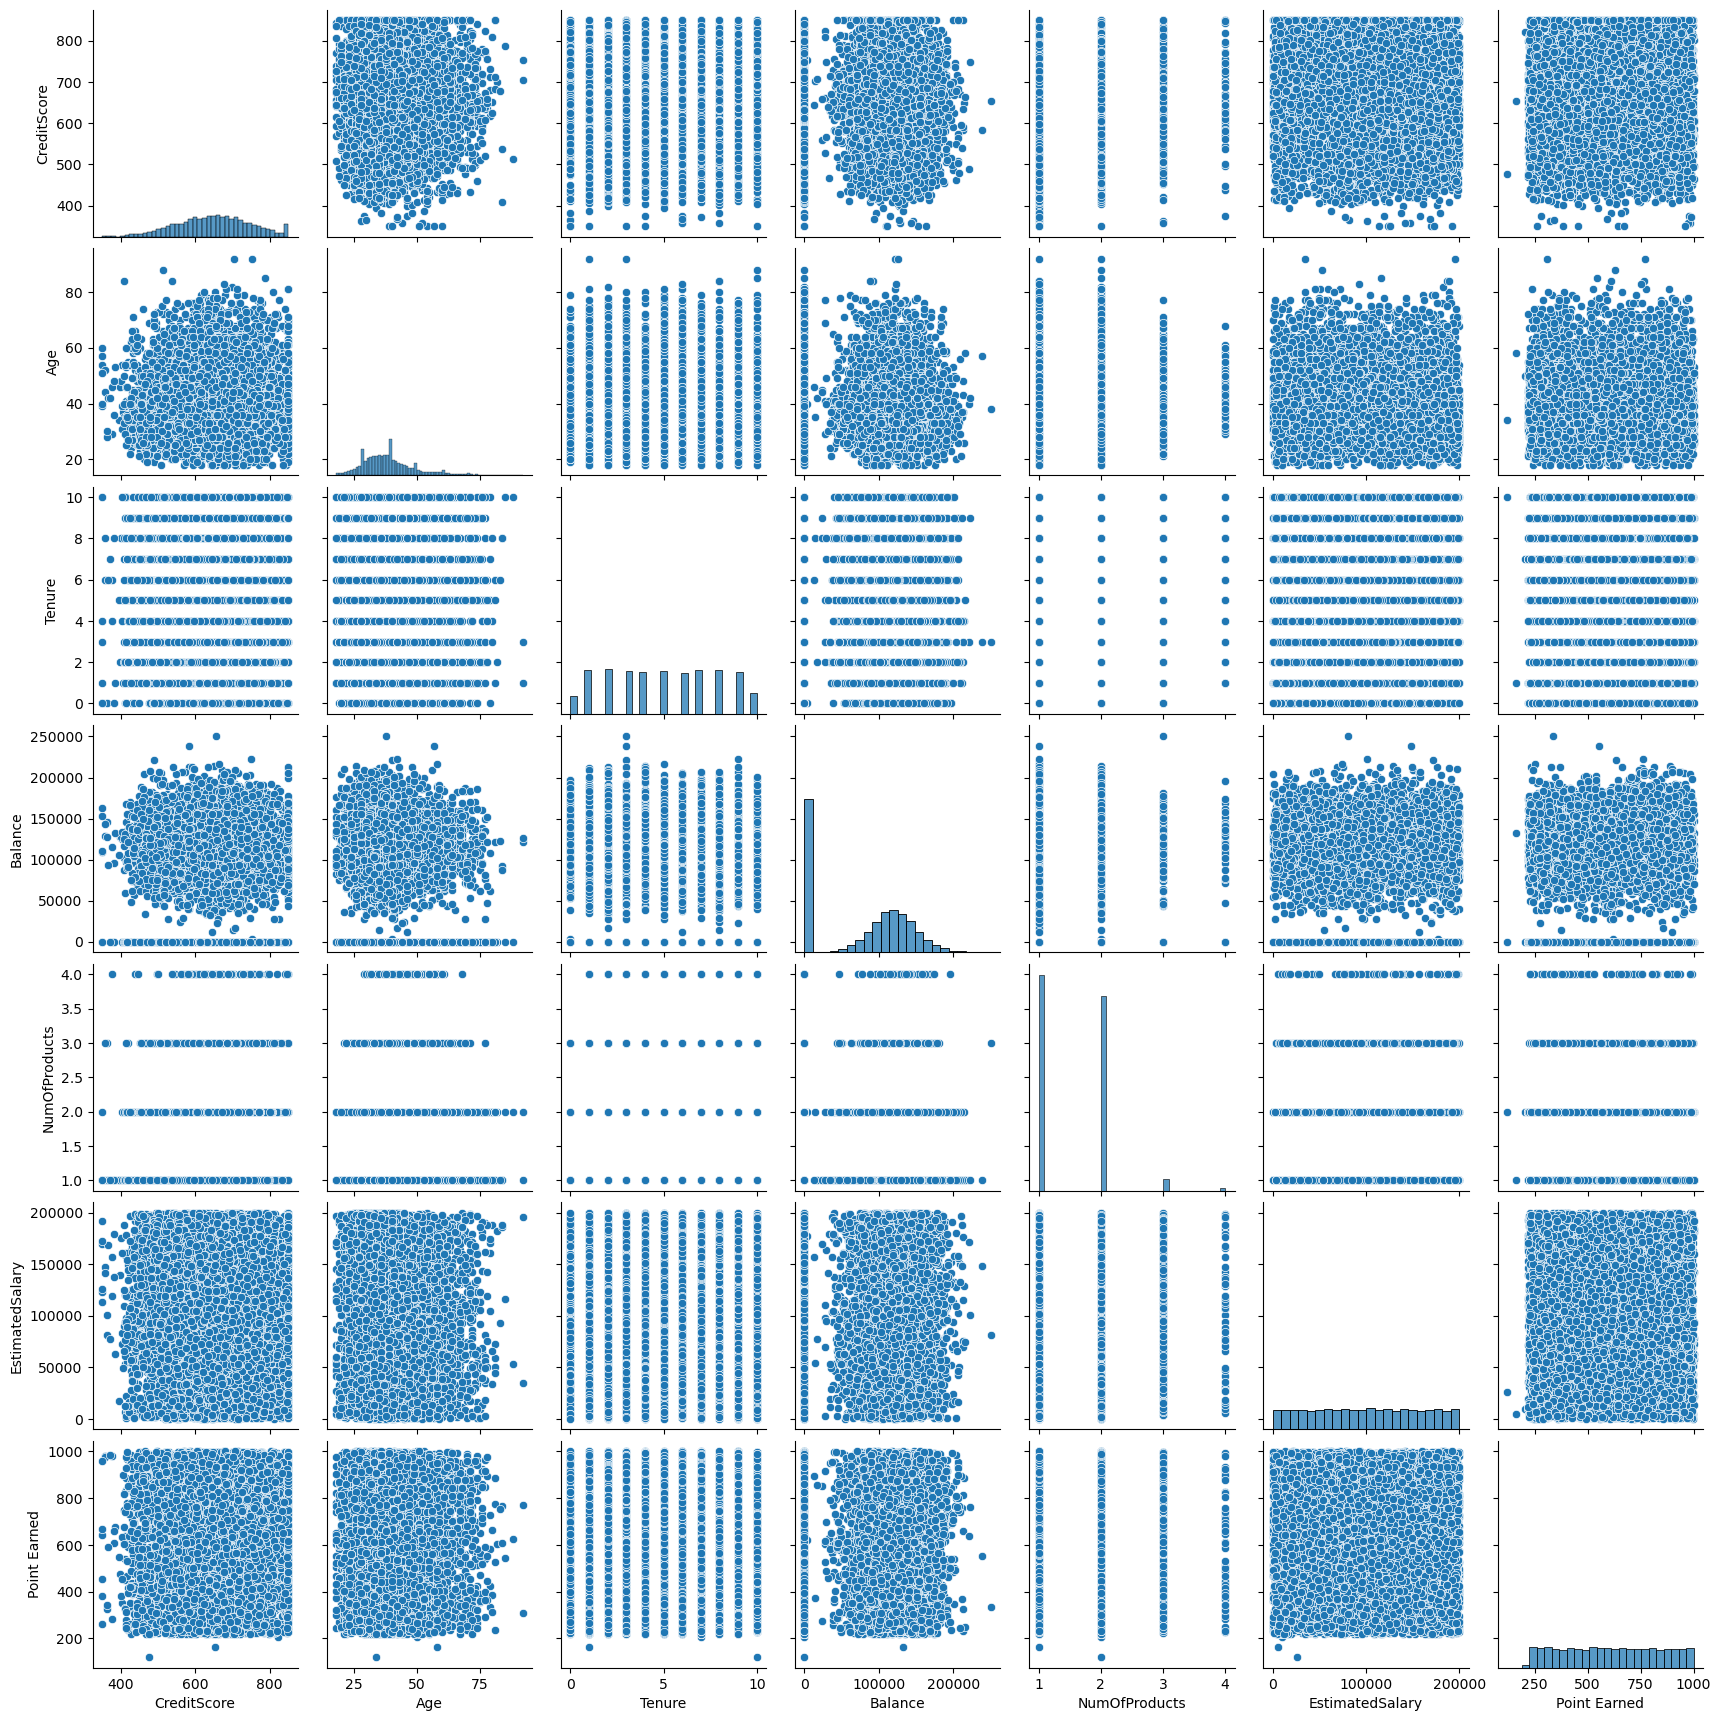

In [80]:
sns.pairplot(numeric_columns)

In [81]:
# Check correlation between exited variable and other numeric columns

numeric_col = [col for col in data.columns if data[col].dtypes in ['int64', 'float64']]
correlation = {}
for col in numeric_col:
    corr = data[col].corr(data['Exited'])
    correlation[col] = round(corr,4)
print(correlation)

{'CreditScore': -0.0268, 'Age': 0.2853, 'Tenure': -0.0137, 'Balance': 0.1186, 'NumOfProducts': -0.0476, 'EstimatedSalary': 0.0125, 'Point Earned': -0.0046}


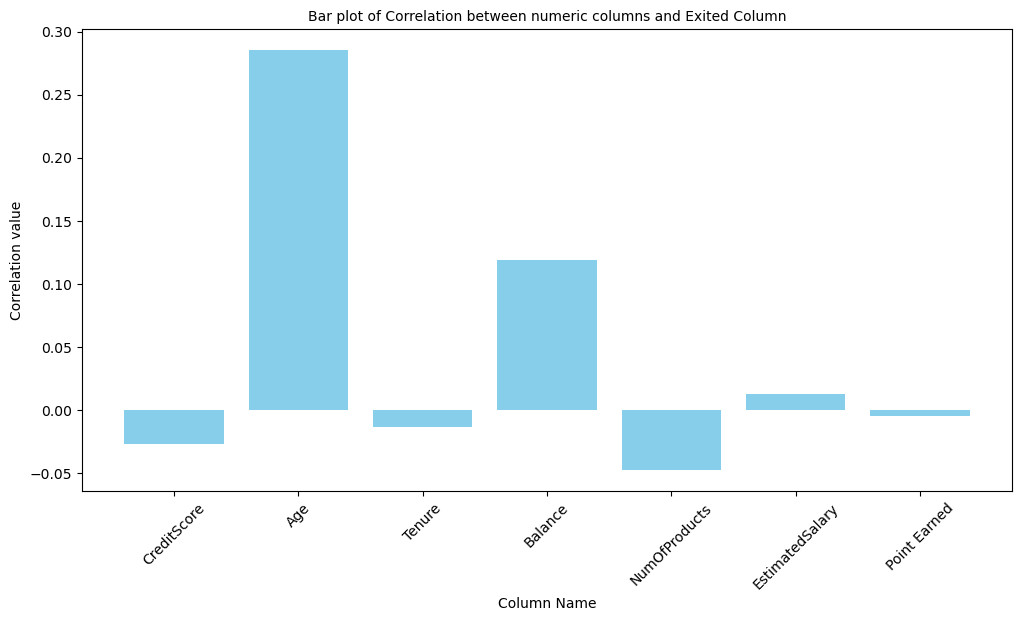

In [82]:
# Visualization of correlation between numeric columns with Exited column

column = list(correlation.keys())
values = list(correlation.values())
# Plotting
plt.figure(figsize = (12,6))
plt.bar(column, values, color = 'skyblue')
# Title
plt.xticks(rotation = 45)
plt.title('Bar plot of Correlation between numeric columns and Exited Column', fontsize = 10)
plt.ylabel('Correlation value')
plt.xlabel('Column Name')
plt.show()

1. There is positive correlation between age and people exiting the bank followed by balance 
2. There is negative correlation between number of products purchased by customer and people exiting the bank, same is happening for credit score and tenure

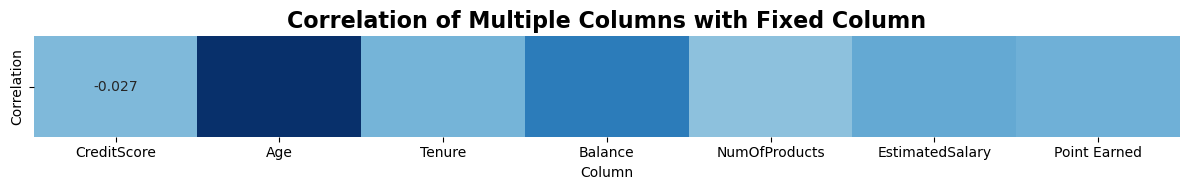

In [83]:
# Correlation heatmap

# Convert dictionary to DataFrame for heatmap
corr_df = pd.DataFrame(list(correlation.items()), columns=['Column', 'Correlation'])
corr_df = corr_df.set_index('Column').transpose()

# Create the heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(corr_df, annot=True, cmap='Blues', center=0, cbar=False)

# Add title
plt.title('Correlation of Multiple Columns with Fixed Column', fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [84]:
# Covert Exited column
dict1 = {1: 'Yes', 0: 'No'}
data['Exited'] = data['Exited'].map(dict1)

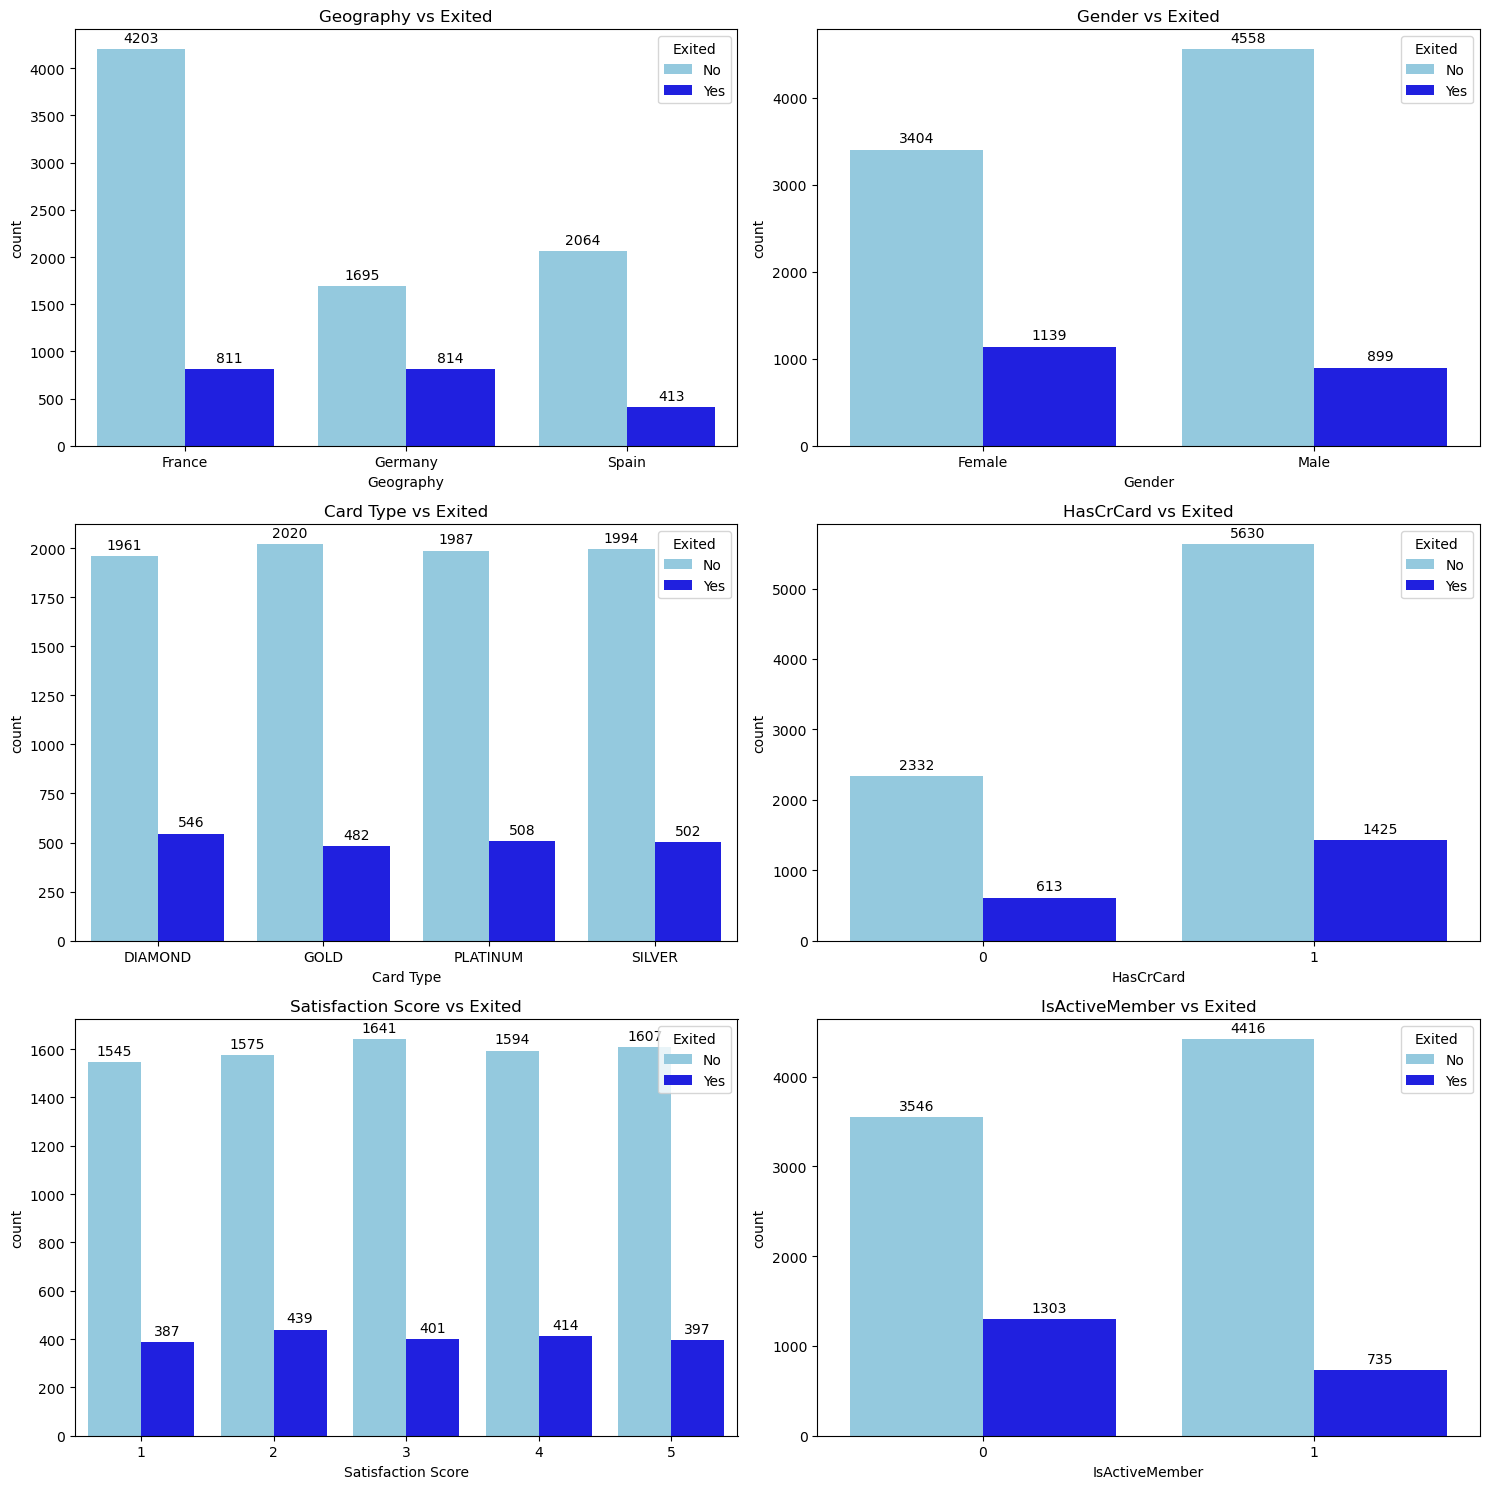

In [85]:
column = ['Geography', 'Gender', 'Card Type', 'HasCrCard', 'Satisfaction Score','IsActiveMember']
# Plotting category verses exited
# Calculate number of rows and columns for subplots
num_plots = len(column)
nrows = (num_plots + 1) // 2
ncols = 2
# Define custom colors for the hue categories
custom_palette = {'Yes': 'blue', 'No': 'skyblue'}

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(column):
    plot = sns.countplot(data=data, x=col, hue='Exited', ax=axes[i],palette = custom_palette)
    axes[i].set_title(f'{col} vs Exited')

 # Add values on top of bars
    for p in plot.patches:
        height = int(p.get_height())
        plot.annotate(f'{height}', 
                      xy=(p.get_x()+ p.get_width() / 2, height), 
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords='offset points',
                      ha='center', va='bottom')
plt.tight_layout()
plt.show()

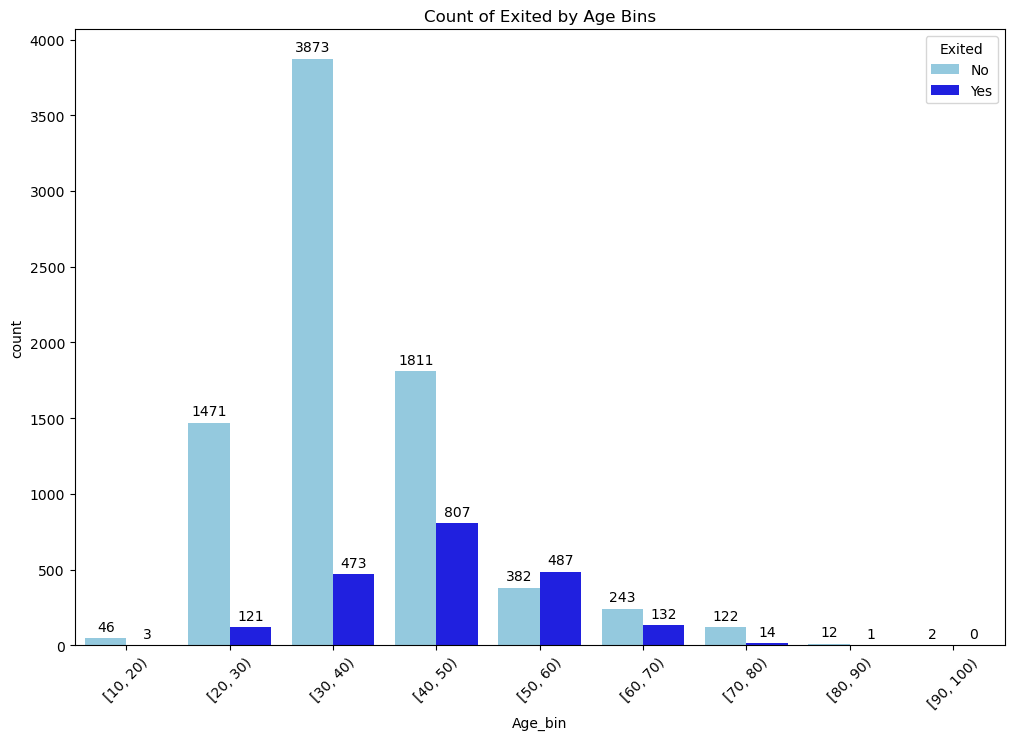

In [86]:
# Age vs Exited column
plt.figure(figsize = (12,8))
bins = [10,20,30,40,50,60,70,80,90,100]
data['Age_bin'] = pd.cut(data.Age, bins = bins, right = False)
plot = sns.countplot(data = data, x = 'Age_bin', hue = 'Exited', palette = {'Yes': 'blue', 'No': 'skyblue'})
# Add bin values on top of bars
for p in plot.patches:
    height = int(p.get_height())
    plot.annotate(f'{height}', 
                  xy=(p.get_x() + p.get_width() / 2, height), 
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords='offset points',
                  ha='center', va='bottom')

plt.title('Count of Exited by Age Bins')

plt.xticks(rotation= 45)
plt.show()

1. Most of the customers are from age group 30 to 40
2. Most of the customers who have left the bank are from age group 40 to 60 
3. There are very few customers aged above 80 


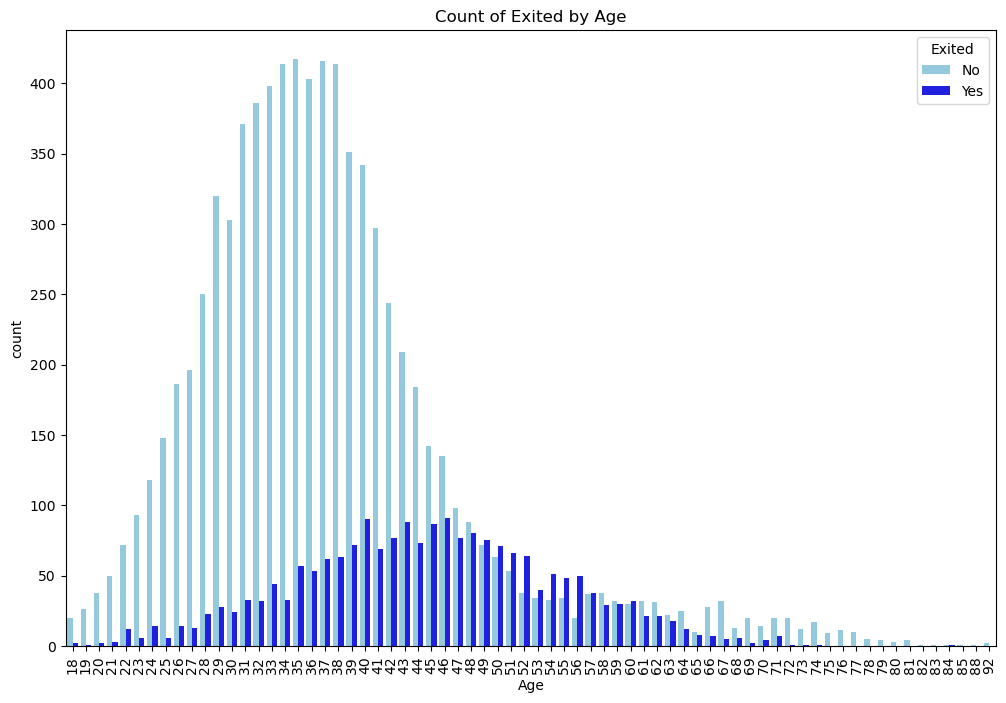

In [87]:
plt.figure(figsize = (12,8))
sns.countplot(data = data, x = 'Age', hue = 'Exited', palette = {'Yes': 'blue', 'No': 'skyblue'})
plt.xticks(rotation= 90)
plt.title('Count of Exited by Age')
plt.show()

In [88]:
# Checking churn by geography
churn_by_geography = data.groupby('Geography')['Exited'].value_counts(normalize=True)
churn_by_geography

Geography  Exited
France     No        0.838253
           Yes       0.161747
Germany    No        0.675568
           Yes       0.324432
Spain      No        0.833266
           Yes       0.166734
Name: proportion, dtype: float64

Geography and Customer Exit Rates:

1.In France, 16.17% of customers have exited, while 83.83% have not exited.

2.In Germany, 32.44% of customers have exited, while 67.56% have not exited.

3.In Spain, 16.67% of customers have exited, while 83.33% have not exited.

In [89]:
# checking churn by gender
churn_by_gender = data.groupby('Gender')['Exited'].value_counts(normalize=True)
churn_by_gender

Gender  Exited
Female  No        0.749285
        Yes       0.250715
Male    No        0.835257
        Yes       0.164743
Name: proportion, dtype: float64

Gender and Customer Exit Rates:

1.Among female customers, 25.07% have exited, while 74.93% have not exited.

2.Among male customers, 16.47% have exited, while 83.53% have not exited.

In [90]:
# # checking churn by tenure
churn_by_tenure = data.groupby('Tenure')['Exited'].value_counts(normalize = True)
churn_by_tenure

Tenure  Exited
0       No        0.769976
        Yes       0.230024
1       No        0.775845
        Yes       0.224155
2       No        0.808206
        Yes       0.191794
3       No        0.788900
        Yes       0.211100
4       No        0.794742
        Yes       0.205258
5       No        0.793478
        Yes       0.206522
6       No        0.797311
        Yes       0.202689
7       No        0.827821
        Yes       0.172179
8       No        0.807805
        Yes       0.192195
9       No        0.782520
        Yes       0.217480
10      No        0.793878
        Yes       0.206122
Name: proportion, dtype: float64

Most of the customer with tenure 0 have left the bank

In [91]:
# # checking churn by active number or not
churn_by_isacivemember = data.groupby('IsActiveMember')['Exited'].value_counts(normalize = True)
churn_by_isacivemember

IsActiveMember  Exited
0               No        0.731285
                Yes       0.268715
1               No        0.857309
                Yes       0.142691
Name: proportion, dtype: float64

Active Membership and Customer Exit Rates:

1.Among inactive members, 26.87% have exited, while 73.13% have not exited.

2.Among active members, 14.27% have exited, while 85.73% have not exited.

In [92]:
# # checking churn by credit card
churn_by_creditcard = data.groupby('HasCrCard')['Exited'].value_counts(normalize = True)
churn_by_creditcard

HasCrCard  Exited
0          No        0.791851
           Yes       0.208149
1          No        0.798016
           Yes       0.201984
Name: proportion, dtype: float64

Credit Card Ownership and Customer Exit Rates:

1.Among customers without a credit card, 20.81% have exited, while 79.19% have not exited.

2.Among customers with a credit card, 20.20% have exited, while 79.80% have not exited.

In [93]:
# # checking churn by satisfaction score
churn_by_satisfactionscore = data.groupby('Satisfaction Score')['Exited'].value_counts(normalize = True)
churn_by_satisfactionscore

Satisfaction Score  Exited
1                   No        0.799689
                    Yes       0.200311
2                   No        0.782026
                    Yes       0.217974
3                   No        0.803624
                    Yes       0.196376
4                   No        0.793825
                    Yes       0.206175
5                   No        0.801896
                    Yes       0.198104
Name: proportion, dtype: float64

In [94]:
# Outlier Detection

column = ['CreditScore', 'NumOfProducts','Age']

for col in column:
    Q1= np.percentile(data[col], 25)
    Q3= np.percentile(data[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    print(f'lower Bound is {lower_bound}')
    upper_bound = Q3 + 1.5*IQR
    print(f'Upper Bound is {upper_bound}')
    thr = pd.DataFrame(data[col][(data[col] < lower_bound) | (data[col] > upper_bound)])
    print(thr)
    print('*'*50)
    


lower Bound is 383.0
Upper Bound is 919.0
      CreditScore
7             376
942           376
1193          363
1405          359
1631          350
1838          350
1962          358
2473          351
2579          365
8154          367
8723          350
8762          350
9210          382
9356          373
9624          350
**************************************************
lower Bound is -0.5
Upper Bound is 3.5
      NumOfProducts
7                 4
70                4
1254              4
1469              4
1488              4
1701              4
1876              4
2124              4
2196              4
2285              4
2462              4
2499              4
2509              4
2541              4
2614              4
2617              4
2872              4
3152              4
3365              4
3841              4
4013              4
4014              4
4166              4
4260              4
4403              4
4511              4
4516              4
4606              4


#### HYPOTHESIS TESTING

Number Of Products Vs Customer Churn

H0 : There is no significant difference between the Number of products customer buying and exiting the bank

H1 : There is significant difference between the Number of products customer buying and exiting the bank

In [95]:
Products = pd.crosstab(data['NumOfProducts'], data['Exited'])
Products

Exited,No,Yes
NumOfProducts,,
1,3675,1409
2,4241,349
3,46,220
4,0,60


In [96]:
chi_stat , p_value , dof , expected = chi2_contingency(Products)

print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected : ",expected)

alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("There is significant difference between the Number of products customer buying and exiting the bank")
else:
    print("Fail to Reject Ho")
    print("There is no significant difference between the Number of products customer buying and exiting the bank")

chi_stat :  1501.5048306588592
p_value :  0.0
dof :  3
expected :  [[4047.8808 1036.1192]
 [3654.558   935.442 ]
 [ 211.7892   54.2108]
 [  47.772    12.228 ]]
Reject Ho
There is significant difference between the Number of products customer buying and exiting the bank


There is significant difference between the Number of products customer buying and exiting the bank


 Active Member Vs Customer Churn

H0: There is no association betweeen Active Customer and exiting the bank

H1: There is an association betweeen Active Customer and exiting the bank


In [97]:
active_member = pd.crosstab(data['IsActiveMember'], data['Exited'])
active_member

Exited,No,Yes
IsActiveMember,,
0,3546,1303
1,4416,735


In [98]:
chi_stat , p_value , dof , expected = chi2_contingency(active_member)

print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected : ",expected)

alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("There is an association betweeen Active Customer and exiting the bank.")
else:
    print("Fail to Reject Ho")
    print("There is no association betweeen Active Customer and exiting the bank")

chi_stat :  243.6948024819593
p_value :  6.1531674381134086e-55
dof :  1
expected :  [[3860.7738  988.2262]
 [4101.2262 1049.7738]]
Reject Ho
There is an association betweeen Active Customer and exiting the bank.


There is an association betweeen Active Customer and exiting the bank.


Balance Vs Customer Churn

H0: There is no significant difference between the mean balance of the customer who exited and not exited

H1: There is  significant difference between the mean balance of the customer who exited and not exited

In [99]:
d_exited = data[data['Exited'] == 'Yes']['Balance']
d_stayed = data[data['Exited'] == 'No']['Balance']


stats, pval = ttest_ind(d_stayed, d_exited, equal_var = False)
print(f'Stats value: {stats}')
print(f'P value: {pval}')


alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("There is significant difference between the mean balance of the customer who exited and not exited")
else:
    print("Fail to Reject Ho")
    print("There is no significant difference between the mean balance of the customer who exited and not exited")

Stats value: -12.47802583232175
P value: 5.817634004614694e-35
Reject Ho
There is significant difference between the mean balance of the customer who exited and not exited


There is significant difference between the mean balance of the customer who exited and not exited


Credit Card Vs Customer Churn

H0: There is no impact of credit card on customer churn

H1: There is an impact of credit card on customer churn

In [100]:
card = pd.crosstab(data['HasCrCard'], data['Exited'])
card

Exited,No,Yes
HasCrCard,,
0,2332,613
1,5630,1425


In [101]:
chi_stat , p_value , dof , expected = chi2_contingency(card)

print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected : ",expected)

alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("There is an impact of credit card on customer churn")
else:
    print("Fail to Reject Ho")
    print("There is no impact of credit card on customer churn")

chi_stat :  0.4494039375253385
p_value :  0.5026181509009862
dof :  1
expected :  [[2344.809  600.191]
 [5617.191 1437.809]]
Fail to Reject Ho
There is no impact of credit card on customer churn


There is no impact of credit card on customer churn


Complain Vs Customer churn

H0: There is no effect of complaints on customer churn.

H1: There is an effect of complaints on customer churn.

In [102]:
complain = pd.crosstab(data.Complain, data.Exited)
complain

Exited,No,Yes
Complain,,
0,7952,4
1,10,2034


In [103]:
chi_stat , p_value , dof , expected = chi2_contingency(complain)

print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected : ",expected)

alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("There is an effect of complaints on customer churn.")
else:
    print("Fail to Reject Ho")
    print("There is no affect of complain on customer churn")

chi_stat :  9907.907035880155
p_value :  0.0
dof :  1
expected :  [[6334.5672 1621.4328]
 [1627.4328  416.5672]]
Reject Ho
There is an effect of complaints on customer churn.


There is an effect of complaints on customer churn.


Satisfaction score Vs Customer churn

H0: There is no significant difference in satisfaction score of customer who have exited with complain and exited without complain

H1: There is significant difference in satisfaction score of customer who have exited with complain and exited without complain

In [104]:
exited_customers = data[data['Exited'] == 'Yes']

satis_com = pd.crosstab(exited_customers['Satisfaction Score'], exited_customers['Complain'])

chi2, p_value, a, b = chi2_contingency(satis_com)

alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("There is significant difference in satisfaction score of customer who have exited with complain and exited without complain")
else:
    print("Fail to Reject Ho")
    print("There is no significant difference in satisfaction score of customer who have exited with complain and exited without complain")

Fail to Reject Ho
There is no significant difference in satisfaction score of customer who have exited with complain and exited without complain


There is no significant difference in satisfaction score of customer who have exited with complain and exited without complain


Card Type Vs Customer Churn

H0: There is no association between different card types and customers exiting the bank.

H1: There is an association between different card types and customers exiting the bank.

In [105]:
card = pd.crosstab(data['Card Type'], data['Exited'])
card

Exited,No,Yes
Card Type,,
DIAMOND,1961,546
GOLD,2020,482
PLATINUM,1987,508
SILVER,1994,502


In [106]:
chi_stat , p_value , dof , expected = chi2_contingency(card)

print("chi_stat : ",chi_stat)
print("p_value : ",p_value)

alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("There is an association between different card types and customers exiting the bank.")
else:
    print("Fail to Reject Ho")
    print("There is no association between different card types and customers exiting the bank.")

chi_stat :  5.053223027060927
p_value :  0.16794112067810177
Fail to Reject Ho
There is no association between different card types and customers exiting the bank.


There is no association between different card types and customers exiting the bank.


Point Earned Vs Customer churn

H0: Points earned from credit card usage do not influence customer churn.

H1: Points earned from credit card usage does influence customer churn

In [107]:
p_churn = data[data.Exited == 'Yes']['Point Earned']
np_churn = data[data.Exited == 'No']['Point Earned']


 Test for equal variances
 
H0: Variances are equal

H1: Variances are not equal

In [108]:
l_stat, p_val = levene(p_churn, np_churn)
print(f' P value: {p_val}')

alpha = 0.05
if p_val < alpha:
    print('Reject H0')
    print('Variances are not equal')

else:
    print('Fail to reject H0')
    print('Variances are equal')

 P value: 0.8176344750713012
Fail to reject H0
Variances are equal


In [109]:
t_stat, p_val = ttest_ind(p_churn, np_churn)
print(f' P value: {p_val}')

alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("Points earned from credit card usage does influence customer churn.")
else:
    print("Fail to Reject Ho")
    print("Points earned from credit card usage do not influence customer churn.")


 P value: 0.6435350184288993
Fail to Reject Ho
Points earned from credit card usage do not influence customer churn.


Points earned from credit card usage do not influence customer churn.


Salary Vs Customer churn

H0: Estimated Salary does not influence customer churn decisions.

H1: Estimated Salary does influence customer churn decisions.

In [110]:
churn = data[data.Exited == 'Yes']['EstimatedSalary']
n_churn = data[data.Exited == 'No']['EstimatedSalary']

Equal variances test

H0: Variances are equal

H1: Variances are not equal

In [111]:
l_stat, p_val = levene(churn, n_churn)
print(f' P value: {p_val}')

alpha = 0.05
if p_val < alpha:
    print('Reject H0')
    print('Variances are not equal')

else:
    print('Fail to reject H0')
    print('Variances are equal')

 P value: 0.32105166125575746
Fail to reject H0
Variances are equal


In [112]:
t_stat, p_val = ttest_ind(churn, n_churn)
print(f' P value: {p_val}')

alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("Estimated Salary does  influence customer churn decisions.")
else:
    print("Fail to Reject Ho")
    print("Estimated Salary does not influence customer churn decisions.")


 P value: 0.2117146135149097
Fail to Reject Ho
Estimated Salary does not influence customer churn decisions.


Estimated Salary does not influence customer churn decisions.


Age Vs Customer Churn

H0: There is no significant difference between the mean age of the customer who exited and not exited

H1: There is significant difference between the mean age of the customer who exited and not exited


In [113]:
a_exited = data[data['Exited'] == 'Yes']['Age']
a_stayed = data[data['Exited'] == 'No']['Age']

Equal variances test

H0: Variances are equal

H1: Variances are not equal

In [114]:
l_stat, p_val = levene(a_exited, a_stayed)
print(f' P value: {p_val}')

alpha = 0.05
if p_val < alpha:
    print('Reject H0')
    print('Variances are not equal')

else:
    print('Fail to reject H0')
    print('Variances are equal')

 P value: 0.000318344550440417
Reject H0
Variances are not equal


In [115]:
stats, pval = ttest_ind(a_stayed, a_exited, equal_var=False)

alpha = 0.05

if p_val < alpha:
    print('Reject H0')
    print('There is significant difference between the mean age of the customer who exited and not exited')
else:
    print('Fail to reject H0')
    print('There is no significant difference between the mean age of the customer who exited and not exited')


Reject H0
There is significant difference between the mean age of the customer who exited and not exited


There is significant difference between the mean age of the customer who exited and not exited


Gender Vs Customer Churn

H0: There is no association between the Gender and customer exiting the bank

H1: There is an association between the Gender and customer exiting the bank


In [116]:
gender = pd.crosstab(data.Exited, data.Gender)
gender

Gender,Female,Male
Exited,,
No,3404,4558
Yes,1139,899


In [117]:
chi_stat , p_value , dof , expected = chi2_contingency(gender)

print("chi_stat : ",chi_stat)
print("p_value : ",p_value)

alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("There is an association between the Gender and customer exiting the bank")
else:
    print("Fail to Reject Ho")
    print("There is no association between the Gender and customers exiting the bank.")

chi_stat :  112.39655374778587
p_value :  2.9253677618642e-26
Reject Ho
There is an association between the Gender and customer exiting the bank


There is an association between the Gender and customer exiting the bank


 Geography and Customer Churn

H0: There is no association between the geographical locations of the customer and exiting the Bank

H1: There is association between the geographical locations of the customer and exiting the Bank



In [118]:
geography = pd.crosstab(data.Exited, data.Geography)
geography

Geography,France,Germany,Spain
Exited,,,
No,4203,1695,2064
Yes,811,814,413


In [119]:
chi_stat , p_value , dof , expected = chi2_contingency(geography)

print("chi_stat : ",chi_stat)
print("p_value : ",p_value)

alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("There is an association between the geographical locations of the customer and exiting the Bank")
else:
    print("Fail to Reject Ho")
    print("There is no association between the geographical locations of the customer and exiting the Bank")

chi_stat :  300.6264011211942
p_value :  5.245736109572763e-66
Reject Ho
There is an association between the geographical locations of the customer and exiting the Bank


There is an association between the geographical locations of the customer and exiting the Bank


#### Insights


1. Age Range: The age of customers ranges from 18 to 92 years.
2. Tenure: The tenure ranges from 0 to 10 years, with an average tenure of 5 years.
3. Balance: The balance of customers varies from 0 to 250,000.
4. Products: Customers can have up to 4 products.
5. Credit Card Points: Customers can earn up to 1,000 points using their credit cards.
6. Churn Rate: 20.4% of the customers have exited the bank.
7. Customer Distribution by Country:
        France: 5,014 customers
        Germany: 2,509 customers
        Spain: 2,477 customers
8. Gender Distribution: 54% of customers are male.
9. Credit Card Usage: 70.55% of customers use credit cards.
10. Complaint Filing: 20.44% of customers have filed complaints.
11. Satisfaction Scores: Most customers have given a satisfaction score of 3, followed by scores 2, 4, 5, and 1.
12. Card Usage: Most customers use Diamond cards (2,507) and Gold cards (2,503), followed by Silver and Platinum.

13. Customers in Germany have a higher exit rate compared to those in France and Spain.

14. Female customers have a higher exit rate compared to male customers.

15.  Most customers with a tenure of 0 have left the bank.

16.  Inactive members have a higher exit rate compared to active members.

17.  There is no significant impact of credit card ownership on customer churn.

18. There is a significant difference in the number of products customers buy and their likelihood of exiting the bank.
19. There is an association between active membership and customer exit rates.
20. There is a significant difference between the mean balance of customers who exited and those who did not.
21. There is an association between geographical location and customer exit rates.
22. There is an association between gender and customer exit rates.

#### Recommendation
1. Target Germany for Retention: Develop strategies to address the higher churn rate in Germany, such as personalized customer engagement and addressing specific issues faced by German customers
 
2. Focus on Female Customers: Implement targeted retention strategies for female customers, such as personalized offers and improving customer service.


3. Engage New Customers: Develop programs to better engage new customers with a tenure of 0 years to reduce early churn.


4. Promote Active Membership: Encourage inactive members to become active through loyalty programs, rewards, and personalized engagement.


5. Comprehensive Retention Strategies: Implement broad strategies to improve overall customer satisfaction and retention, considering the insights on products, balance, and geographical differences